In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from eeg_net.eeg_net_base import *
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

In [2]:
import numpy as np
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

# adjust lable to 0,1,2,3
y_train_valid -= 769
y_test -= 769 
print ('y_train_valid', y_train_valid[:10])


y_train_valid [2 3 0 0 0 0 2 1 3 3]


### Shape of data

In [3]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


## print one data


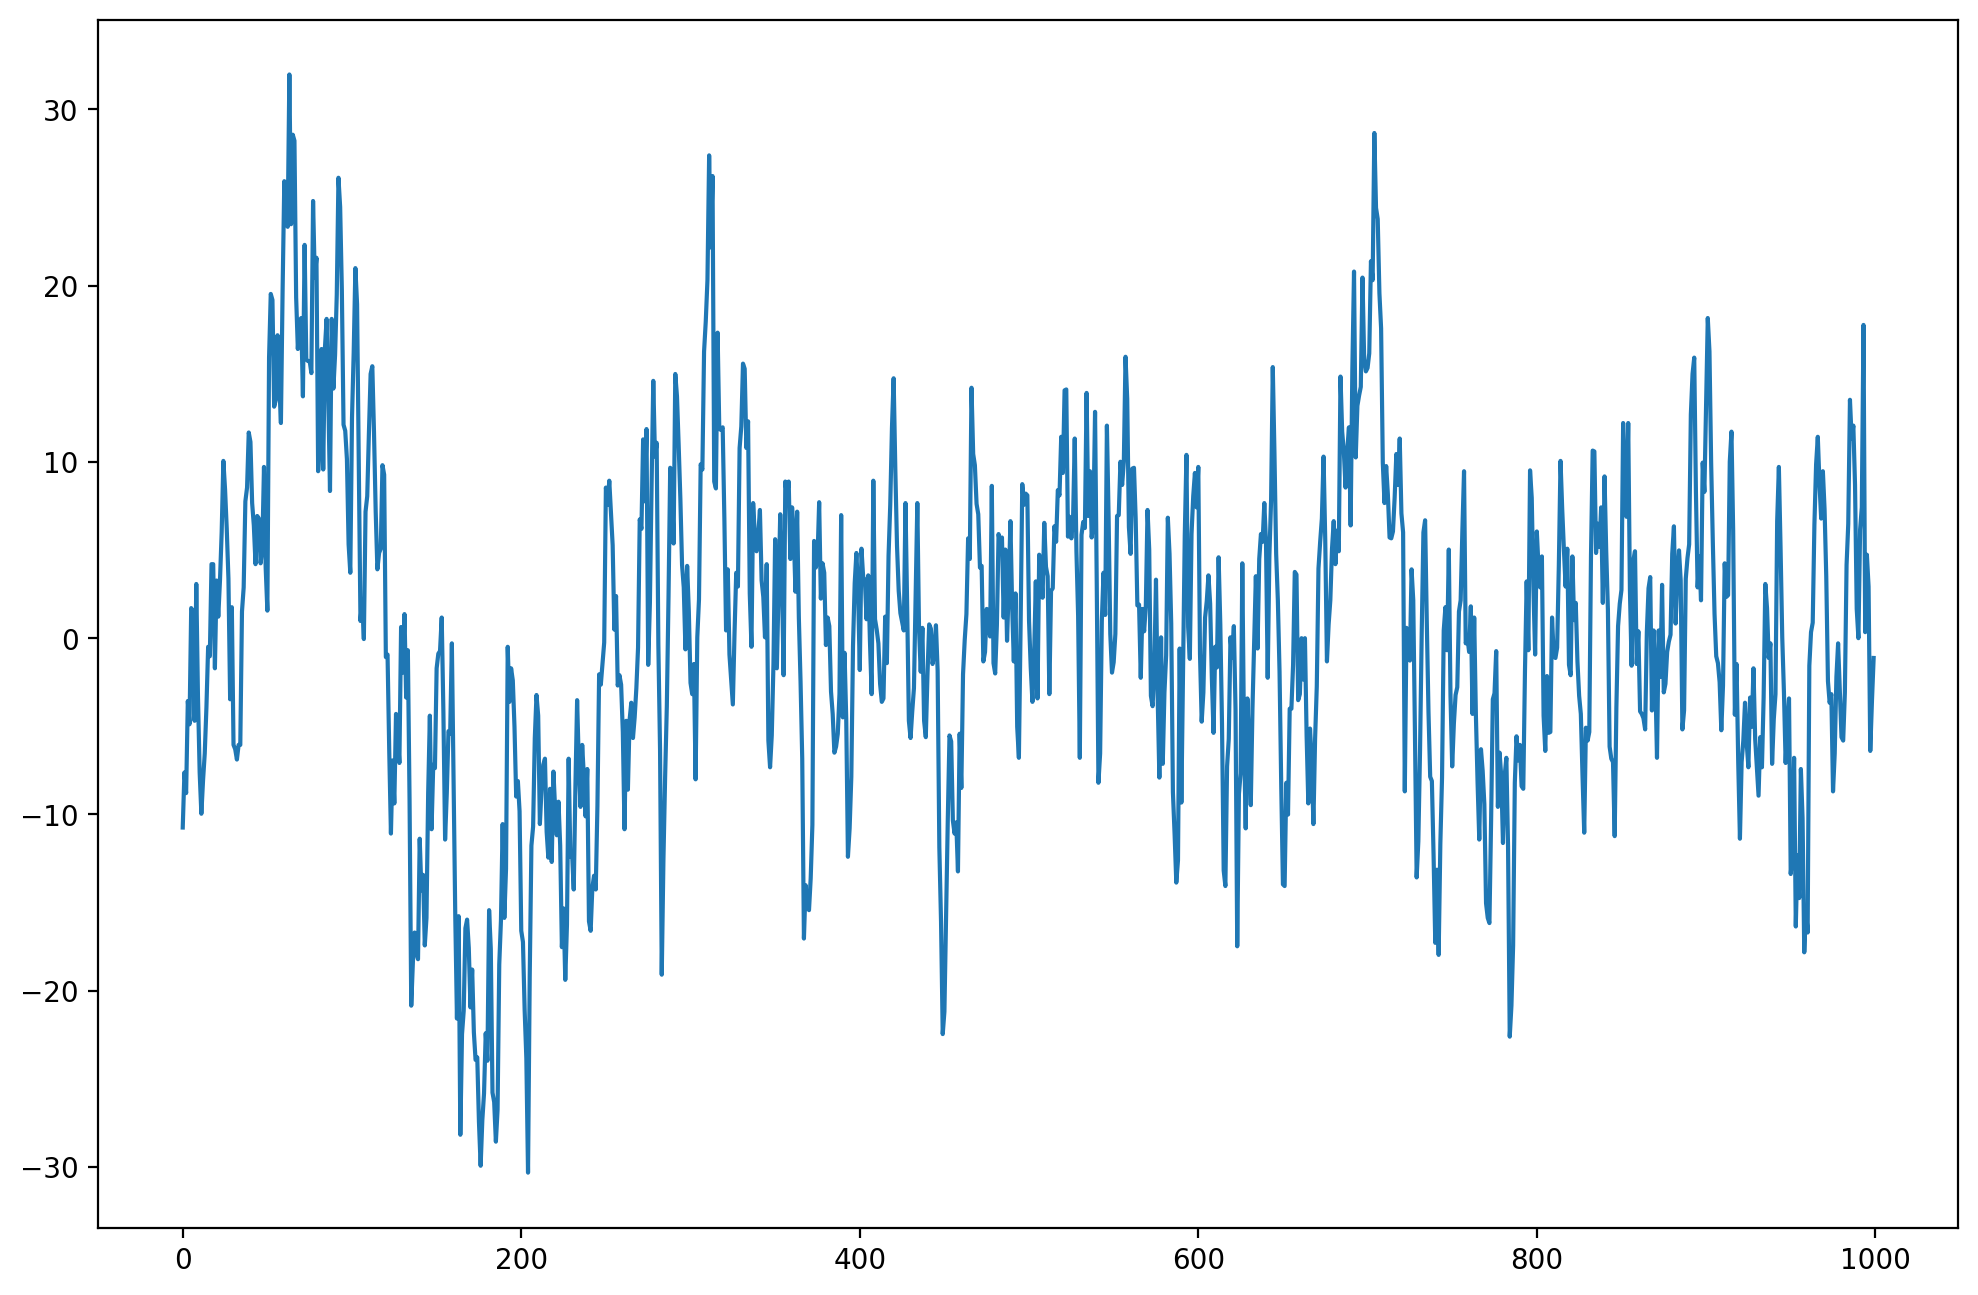

In [4]:
plot = plt.plot(X_train_valid[1,12])

In [5]:
X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.335465
0	1.367199	0.316290	1.333901	0.368794	
--Iter 49	1.309298
1	1.315000	0.397237	1.313213	0.385343	
--Iter 49	1.237605
2	1.291296	0.424781	1.293287	0.406619	
--Iter 49	1.309419
3	1.270362	0.466055	1.268645	0.463357	
--Iter 49	1.263860
4	1.252439	0.494104	1.265854	0.465721	
--Iter 49	1.282378
5	1.236154	0.509350	1.236710	0.508274	
--Iter 49	1.366038
6	1.220283	0.536557	1.229461	0.517730	
--Iter 49	1.191360
7	1.205795	0.553908	1.215845	0.536643	
--Iter 49	1.192069
8	1.199459	0.553993	1.208654	0.536643	
--Iter 49	1.218845
9	1.188417	0.571176	1.205266	0.541371	
--Iter 49	1.203263
10	1.181648	0.583979	1.201834	0.560284	
--Iter 49	1.074267
11	1.176779	0.583137	1.201964	0.555556	
--Iter 49	1.186368
12	1.168590	0.593918	1.195172	0.562648	
--Iter 49	1.222111
13	1.163973	0.610596	1.198101	0.553191	
--Iter 49	1.090040
14	1.159101	0.604111	1.182204	0.557920	
--Iter 49	1.110060
15	1.155876	0.608912	1.196457	0.555556	
-

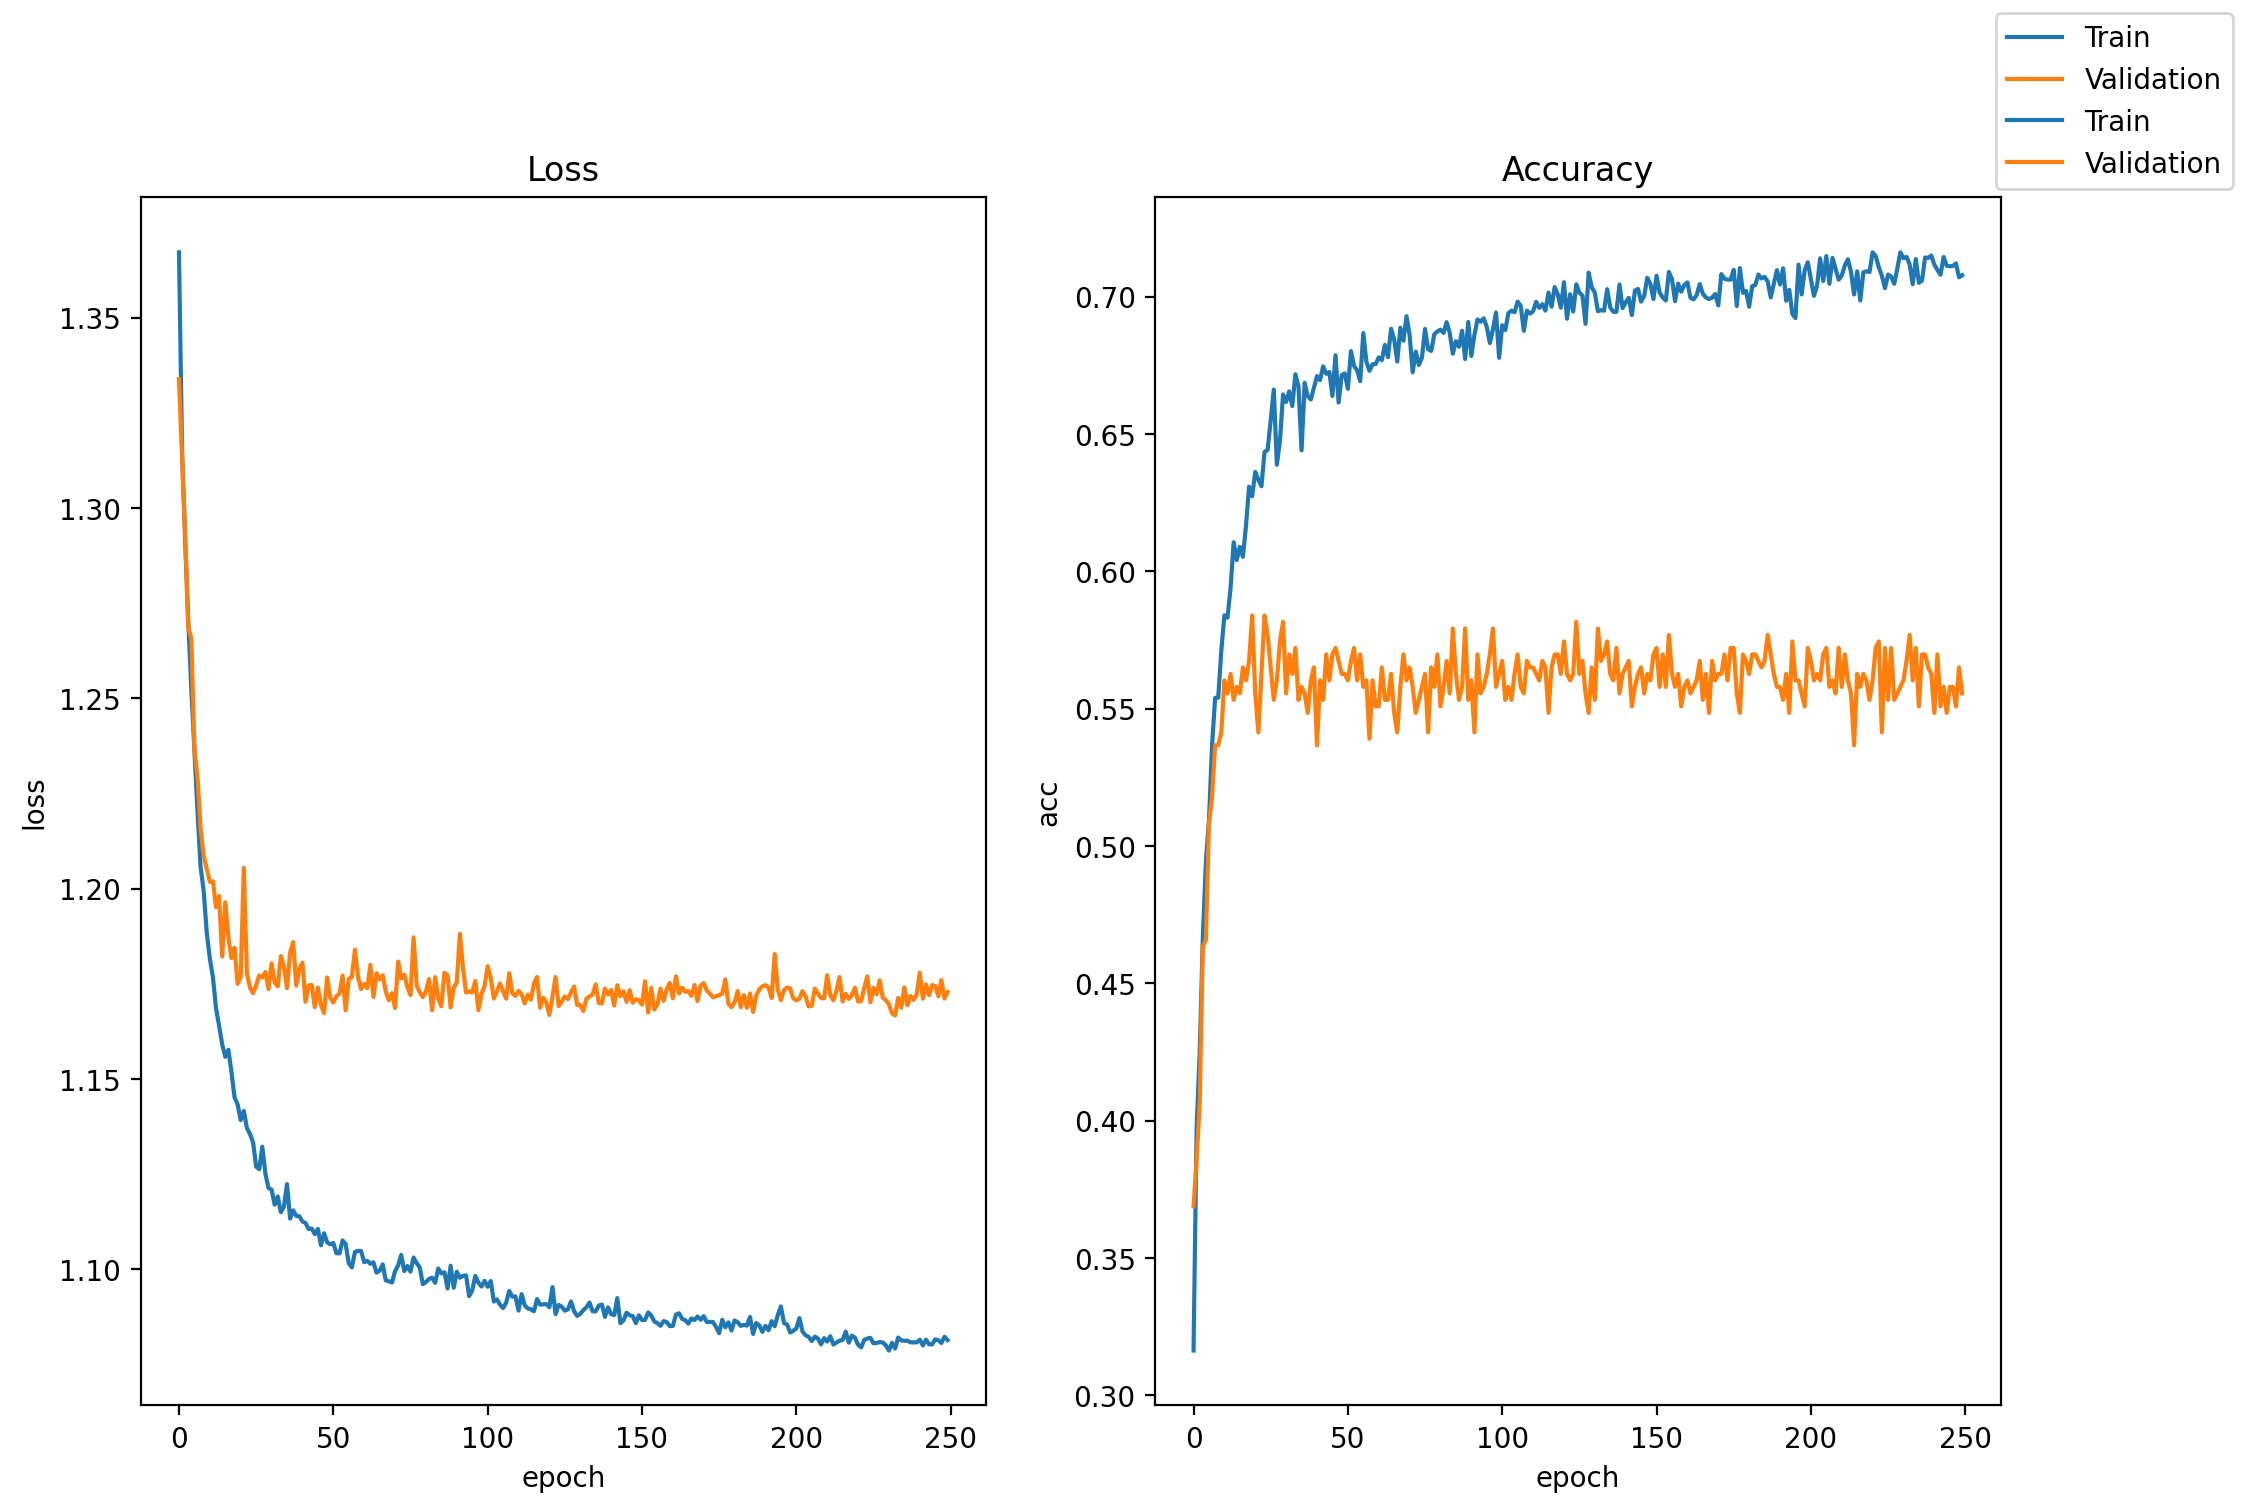

In [8]:
model = ShallowConv(1,4).to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1 
}
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)


Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.413318
0	1.405595	0.267268	1.446179	0.226950	
--Iter 49	1.383198
1	1.414104	0.243430	1.392889	0.262411	
--Iter 49	1.494488
2	1.431526	0.251685	1.400395	0.295508	
--Iter 49	1.362667
3	1.411709	0.267773	1.400238	0.252955	
--Iter 49	1.376631
4	1.400832	0.270047	1.394520	0.347518	
--Iter 49	1.330930
5	1.416909	0.271311	1.397455	0.290780	
--Iter 49	1.315012
6	1.411410	0.279902	1.394645	0.309693	
--Iter 49	1.406117
7	1.407957	0.285377	1.390080	0.319149	
--Iter 49	1.361301
8	1.397013	0.306351	1.382701	0.338061	
--Iter 49	1.401340
9	1.409504	0.279987	1.409366	0.257683	
--Iter 49	1.375033
10	1.404664	0.267689	1.378498	0.352246	
--Iter 49	1.354029
11	1.395379	0.278049	1.375224	0.326241	
--Iter 49	1.343940
12	1.389031	0.298854	1.404900	0.257683	
--Iter 49	1.439565
13	1.385435	0.289084	1.370779	0.326241	
--Iter 49	1.391669
14	1.383286	0.286472	1.376217	0.349882	
--Iter 49	1.381352
15	1.376581	0.307193	1.359749	0.359338	
-

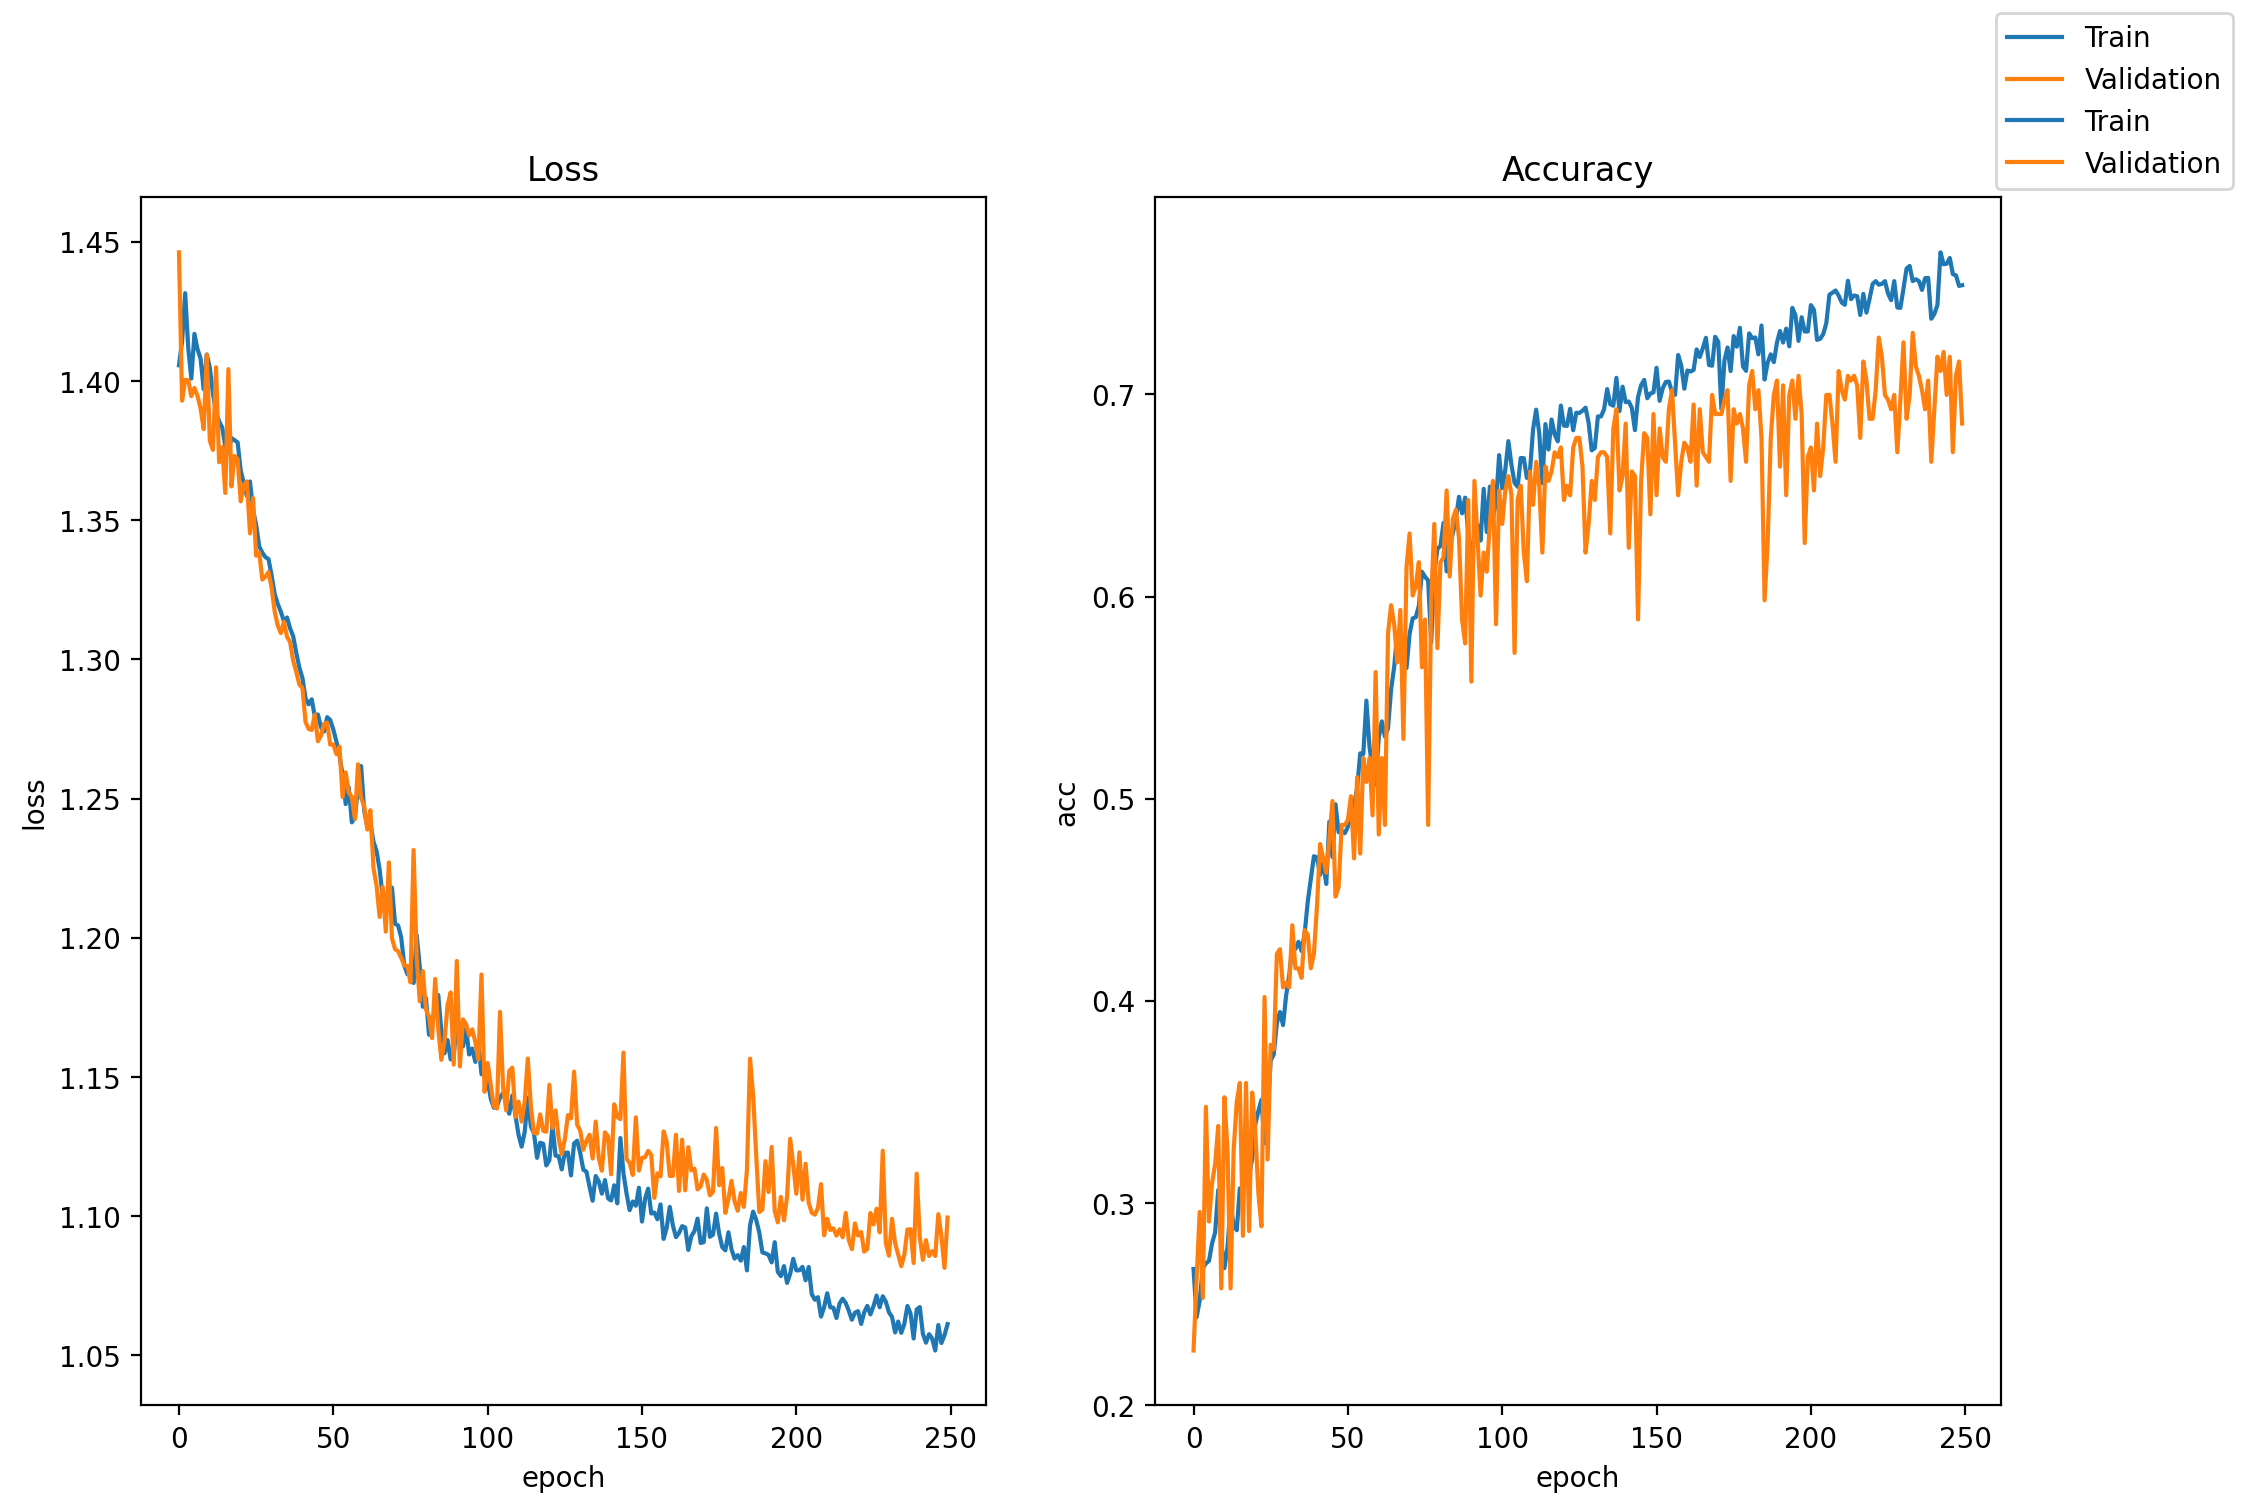

In [10]:
model = ShallowConv(1,4).to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'transform': 'shift_positive'
}
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

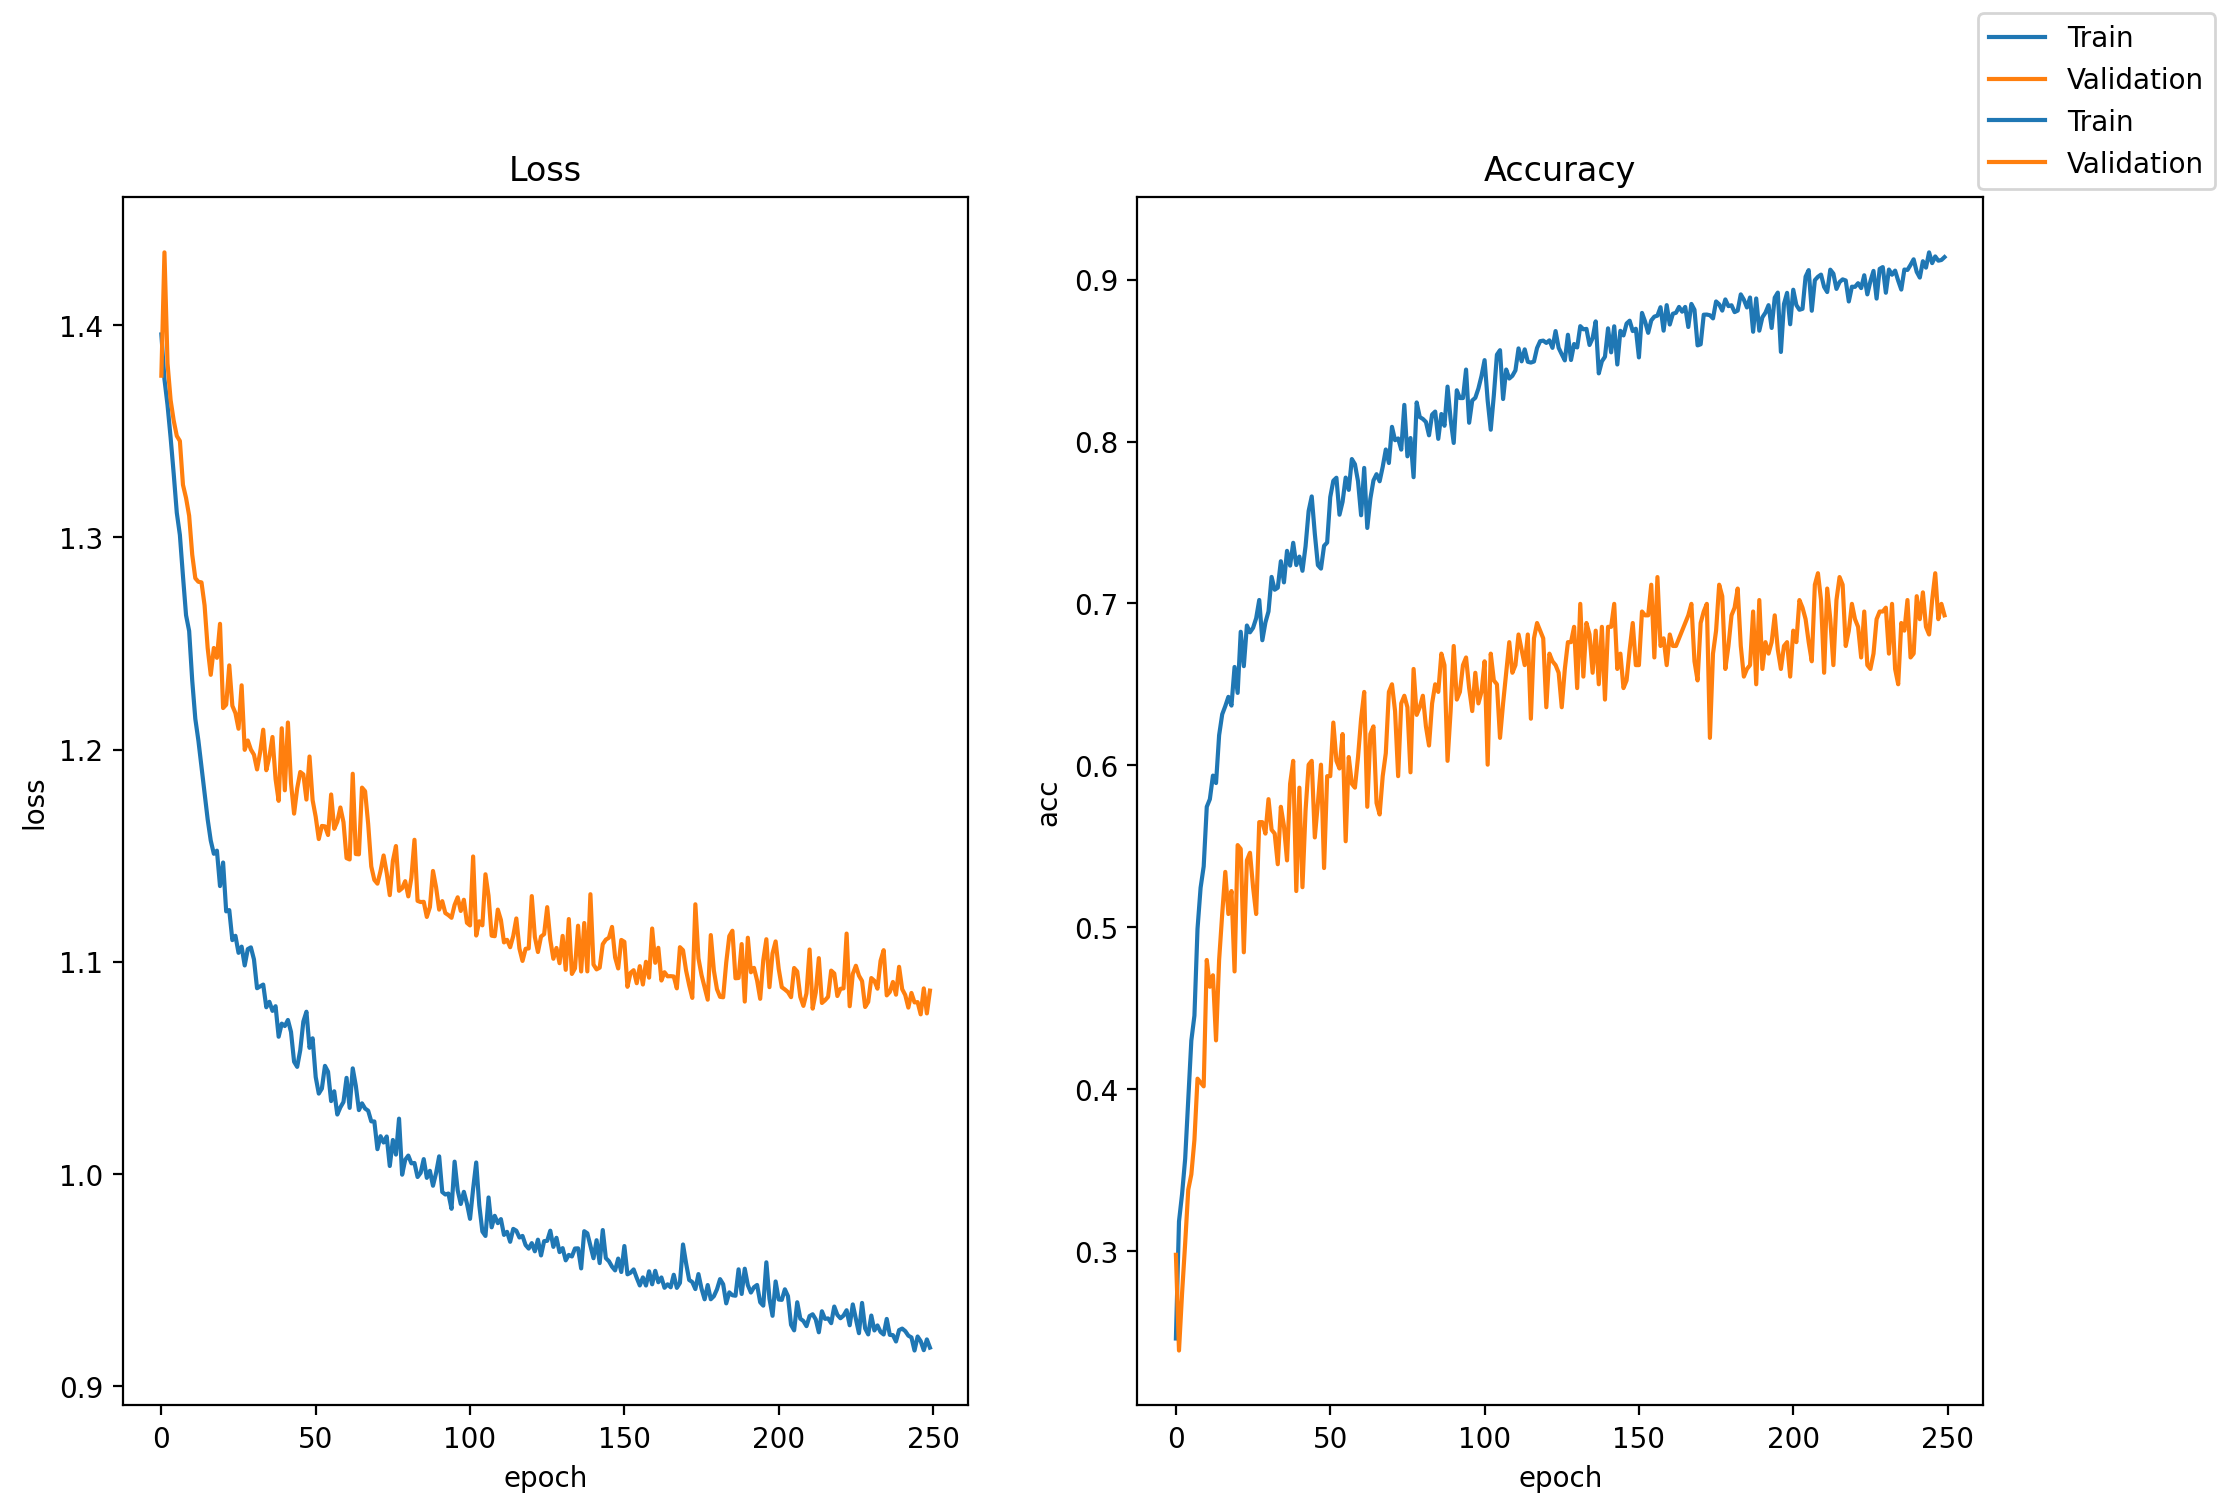

In [26]:
import matplotlib.pyplot as plt 
fig,(ax1,ax2) = plt.subplots(1,2) 
ax1.plot(logs['train_loss'],label='Train')
ax1.plot(logs['val_loss'],label = 'Validation')
ax1.set_title('Loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax2.plot(logs['train_acc'],label = 'Train')
ax2.plot(logs['val_acc'],label = 'Validation')
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('acc')
fig.legend() 
plt.show() 